In [1]:
# importing important libraries
import matplotlib as plt
%matplotlib inline
import numpy as np
from sklearn import mixture
import pandas as pd
import seaborn as sns

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Reading in the Data

In [3]:
pass_attempt_df = \
    pd.read_csv("~/Desktop/CoverageNet/src/01_identify_man_coverage/outputs/corners_pass_attempts_man_zone_gmm_features.csv")
pass_attempt_df.shape

(54585, 157)

In [4]:
sacks_df = \
    pd.read_csv("~/Desktop/CoverageNet/src/01_identify_man_coverage/outputs/corners_sacks_man_zone_gmm_features.csv")
sacks_df.shape

(3962, 98)

In [5]:
# printing the number of weeks of data available
np.unique(pass_attempt_df['week'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

# Clustering Pass Attempt Coverage

In [6]:
filter_col = [col for col in pass_attempt_df if not '_o_' in col]
pass_attempt_df = pass_attempt_df[filter_col]

In [7]:
filter_col = [col for col in pass_attempt_df if not 'facing' in col]
pass_attempt_df = pass_attempt_df[filter_col]

In [8]:
filter_col = [col for col in pass_attempt_df if not 'var_y' in col]
pass_attempt_df = pass_attempt_df[filter_col]

In [9]:
filter_col = [col for col in pass_attempt_df if not 'var_x' in col]
pass_attempt_df = pass_attempt_df[filter_col]

In [10]:
filter_col = [col for col in pass_attempt_df if not 'def_mean_time_0' in col]
pass_attempt_df = pass_attempt_df[filter_col]

In [11]:
filter_col = [col for col in pass_attempt_df if not 'def' in col]
pass_attempt_df = pass_attempt_df[filter_col]

In [12]:
filter_col = [col for col in pass_attempt_df if not 'def_var_time_0' in col]
pass_attempt_df = pass_attempt_df[filter_col]

In [13]:
pass_attempt_df.columns

Index(['week', 'gameId', 'playId', 'nflId', 'displayName', 'position',
       'speed_var_time_0', 'speed_var_time_0_1', 'speed_var_time_1',
       'speed_var_time_1_2',
       ...
       'best_cor_y_time_0', 'best_cor_y_time_0_1', 'best_cor_y_time_1',
       'best_cor_y_time_1_2', 'best_cor_y_time_2', 'best_cor_x_y_avg_time_0',
       'best_cor_x_y_avg_time_0_1', 'best_cor_x_y_avg_time_1',
       'best_cor_x_y_avg_time_1_2', 'best_cor_x_y_avg_time_2'],
      dtype='object', length=105)

In [14]:
filter_col = [col for col in pass_attempt_df if not (('cor' in col) and ('best' not in col) and ('s' not in col))]
pass_attempt_df = pass_attempt_df[filter_col]

In [15]:
filter_col = [col for col in pass_attempt_df if not (('cor_rot' in col))]
pass_attempt_df = pass_attempt_df[filter_col]

In [16]:
filter_col = [col for col in pass_attempt_df if not (('cor' in col) and ('time_0' in col))]
pass_attempt_df = pass_attempt_df[filter_col]

In [17]:
filter_col = [col for col in pass_attempt_df if not (('cor' in col) and ('time_2' in col))]
pass_attempt_df = pass_attempt_df[filter_col]

In [18]:
# filter_col = [col for col in pass_attempt_df if not (('cor' in col) and ('x_y' not in col))]
# pass_attempt_df = pass_attempt_df[filter_col]

In [19]:
filter_col = [col for col in pass_attempt_df if not 'off_dir_var_time_0' in col]
pass_attempt_df = pass_attempt_df[filter_col]

In [20]:
filter_col = [col for col in pass_attempt_df if not 'speed' in col]
pass_attempt_df = pass_attempt_df[filter_col]

In [21]:
pass_attempt_df = pass_attempt_df.drop(['cb_off_dir_diff_ball_snap', 'cb_off_dist_ball_snap',
                                       'off_dir_mean_time_0', 'cb_off_dist_pass_forward',
                                       'off_mean_between_ball_snap_and_pass_forward'], axis = 1)

In [22]:
filter_col = [col for col in pass_attempt_df if (not 'rat' in col)|('ratio_pass_forward' in col)]
pass_attempt_df = pass_attempt_df[filter_col]

In [23]:
# filter_col = [col for col in pass_attempt_df if (not 'best' in col)]
# pass_attempt_df = pass_attempt_df[filter_col]

In [24]:
pass_attempt_df.columns

Index(['week', 'gameId', 'playId', 'nflId', 'displayName', 'position',
       'off_var_time_0', 'off_var_time_0_1', 'off_var_time_1',
       'off_var_time_1_2', 'off_var_time_2', 'off_mean_time_0',
       'off_mean_time_0_1', 'off_mean_time_1', 'off_mean_time_1_2',
       'off_mean_time_2', 'off_dir_var_time_1', 'off_dir_var_time_1_2',
       'off_dir_var_time_2', 'off_dir_mean_time_0_1', 'off_dir_mean_time_1',
       'off_dir_mean_time_1_2', 'off_dir_mean_time_2', 'cor_s_time_1',
       'cor_s_time_1_2', 'ratio_pass_forward', 'cb_off_dir_diff_pass_forward',
       'off_dir_diff_between_ball_snap_and_pass_forward', 'best_cor_x_time_1',
       'best_cor_x_time_1_2', 'best_cor_y_time_1', 'best_cor_y_time_1_2',
       'best_cor_x_y_avg_time_1', 'best_cor_x_y_avg_time_1_2'],
      dtype='object')

In [25]:
pass_attempt_df["cor_dist_inter"] = (pass_attempt_df["best_cor_x_y_avg_time_1"]**2)/pass_attempt_df["off_mean_time_1"]
pass_attempt_df["cor_dist_inter"] = pass_attempt_df["cor_dist_inter"].fillna(0)
pass_attempt_df["cor_dist_inter"] = pass_attempt_df["cor_dist_inter"].replace([np.inf], \
                np.percentile(np.array(pass_attempt_df["cor_dist_inter"]), 99))
pass_attempt_df["cor_dist_inter"] = pass_attempt_df["cor_dist_inter"].replace([-np.inf], \
                np.percentile(np.array(pass_attempt_df["cor_dist_inter"]), 1))

In [26]:
pass_attempt_df.head(10)

,week,gameId,playId,nflId,displayName,position,off_var_time_0,off_var_time_0_1,off_var_time_1,off_var_time_1_2,...,ratio_pass_forward,cb_off_dir_diff_pass_forward,off_dir_diff_between_ball_snap_and_pass_forward,best_cor_x_time_1,best_cor_x_time_1_2,best_cor_y_time_1,best_cor_y_time_1_2,best_cor_x_y_avg_time_1,best_cor_x_y_avg_time_1_2,cor_dist_inter
0,1,2018090600,75,2552689,Ronald Darby,CB,0.000307,2.126595,2.334991,6.760635,...,1.003735,0.69,10.00,0.991059,0.996693,0.996152,0.992656,0.993605,0.994675,0.136746
1,1,2018090600,75,2555383,Jalen Mills,CB,0.001680,2.051115,2.075317,1.658779,...,0.535486,20.40,11.75,0.991839,0.969084,0.893204,0.945554,0.942522,0.957319,0.154773
2,1,2018090600,146,2552689,Ronald Darby,CB,0.000479,1.310370,1.533356,2.695306,...,0.285235,14.63,8.41,0.998055,0.998745,0.995289,0.996726,0.996672,0.997735,0.140171
3,1,2018090600,146,2555383,Jalen Mills,CB,0.000957,0.967793,1.170710,3.954483,...,1.104717,129.71,9.22,0.990084,0.508795,0.853983,0.943507,0.922033,0.726151,0.110491
4,1,2018090600,146,2557958,Sidney Jones,CB,0.123231,1.930732,1.270966,1.080767,...,0.897810,9.97,64.66,0.360666,0.800361,0.975222,0.984590,0.667944,0.892476,0.177724
5,1,2018090600,168,2552689,Ronald Darby,CB,0.000187,1.283342,1.408920,1.355697,...,1.804993,32.74,6.78,0.999594,0.999047,0.524308,0.946714,0.761951,0.972880,0.072567
6,1,2018090600,168,2555383,Jalen Mills,CB,0.127870,1.272338,0.430823,1.508115,...,0.533327,25.69,5.44,0.936665,0.956103,0.931165,0.995562,0.933915,0.975832,0.144012
7,1,2018090600,168,2557958,Sidney Jones,CB,0.865792,1.053149,1.171440,1.094309,...,0.554019,154.82,94.51,0.992267,0.505462,0.964629,0.963594,0.978448,0.734528,0.277880
8,1,2018090600,190,2552689,Ronald Darby,CB,0.000018,1.984624,1.805685,1.756160,...,0.489154,36.33,2.56,0.996114,0.793176,0.998201,0.947689,0.997157,0.870432,0.139959
9,1,2018090600,190,2555383,Jalen Mills,CB,0.079316,15.335604,17.552694,21.155270,...,4.408636,15.83,146.68,0.856998,0.631509,0.676553,0.518507,0.766775,0.575008,0.052792


In [27]:
pass_attempt_df.columns

Index(['week', 'gameId', 'playId', 'nflId', 'displayName', 'position',
       'off_var_time_0', 'off_var_time_0_1', 'off_var_time_1',
       'off_var_time_1_2', 'off_var_time_2', 'off_mean_time_0',
       'off_mean_time_0_1', 'off_mean_time_1', 'off_mean_time_1_2',
       'off_mean_time_2', 'off_dir_var_time_1', 'off_dir_var_time_1_2',
       'off_dir_var_time_2', 'off_dir_mean_time_0_1', 'off_dir_mean_time_1',
       'off_dir_mean_time_1_2', 'off_dir_mean_time_2', 'cor_s_time_1',
       'cor_s_time_1_2', 'ratio_pass_forward', 'cb_off_dir_diff_pass_forward',
       'off_dir_diff_between_ball_snap_and_pass_forward', 'best_cor_x_time_1',
       'best_cor_x_time_1_2', 'best_cor_y_time_1', 'best_cor_y_time_1_2',
       'best_cor_x_y_avg_time_1', 'best_cor_x_y_avg_time_1_2',
       'cor_dist_inter'],
      dtype='object')

### Preparing Train/Test Groups

In [28]:
weeks_exclude = [1, 2, 3]
train = pass_attempt_df[[x not in weeks_exclude for x in list(pass_attempt_df["week"])]]
test = pass_attempt_df[[x in weeks_exclude for x in list(pass_attempt_df["week"])]]

In [29]:
X_train = train.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
X_test = test.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)

In [30]:
print(X_train.shape)
print(X_test.shape)

(44754, 29)
(9831, 29)


### Fitting GMM Model

In [31]:
# train
clf_train = mixture.GaussianMixture(n_components=2, covariance_type='full')
f_train = clf_train.fit(X_train)

In [32]:
# test
clf_test = mixture.GaussianMixture(n_components=2, covariance_type='full')
f_test = clf_test.fit(X_test)

### Examining Cluster Results

In [33]:
def get_cluster_means(X, f):
    cluster_means = {}
    for iCnt in range(len(X.columns)):
        cluster_means.update({X.columns[iCnt]:(f.means_[0][iCnt],f.means_[1][iCnt])})
    return cluster_means

In [34]:
get_cluster_means(X_train, f_train)

{'best_cor_x_time_1': (0.9879871304629766, 0.8749510503806619),
 'best_cor_x_time_1_2': (0.9872702355925923, 0.8414694570457721),
 'best_cor_x_y_avg_time_1': (0.9645639373353243, 0.8433501952884581),
 'best_cor_x_y_avg_time_1_2': (0.9704070241759393, 0.8288607451155799),
 'best_cor_y_time_1': (0.9411407442076722, 0.8117493401962538),
 'best_cor_y_time_1_2': (0.9535438127592866, 0.8162520331853869),
 'cb_off_dir_diff_pass_forward': (11.16777803913672, 44.77305445329338),
 'cor_dist_inter': (0.34001503301132585, 0.1624743420298194),
 'cor_s_time_1': (0.9254306714344155, 0.7361466103233969),
 'cor_s_time_1_2': (0.8822866016560982, 0.6381526024344457),
 'off_dir_diff_between_ball_snap_and_pass_forward': (13.01606476500018,
  42.893556694256816),
 'off_dir_mean_time_0_1': (39.94575327028999, 59.03657640263401),
 'off_dir_mean_time_1': (22.87739407018534, 49.53348973368033),
 'off_dir_mean_time_1_2': (20.187911912396423, 49.69203395708401),
 'off_dir_mean_time_2': (13.149483815676335, 50.774

### Computing Rand Index

In [35]:
from sklearn.metrics import adjusted_rand_score

In [36]:
y_train = f_train.predict(X_test)
y_test = f_test.predict(X_test)

In [37]:
adjusted_rand_score(y_train, y_test)

0.9625143708570731

### Iterating Through To Get Cross-Validation Scores

In [38]:
weeks_exclude_vect = [[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15],[15,16,17]]
G_vect = [2, 3, 4, 5, 6, 7, 8, 9]
rand_index_G_vect = []

In [39]:
for G in G_vect:
    rand_index_sum = 0
    # iterating through the week groupings to leave out
    for weeks_exclue in weeks_exclude_vect:
        # creating train/test groups
        train = pass_attempt_df[[x not in weeks_exclude for x in list(pass_attempt_df["week"])]]
        test = pass_attempt_df[[x in weeks_exclude for x in list(pass_attempt_df["week"])]]

        X_train = train.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
        X_test = test.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)

        # train
        clf_train = mixture.GaussianMixture(n_components=G, covariance_type='full', 
                                            n_init = 2, max_iter = 200)
        f_train = clf_train.fit(X_train)

        # test
        clf_test = mixture.GaussianMixture(n_components=G, covariance_type='full',
                                           n_init = 2, max_iter = 200)
        f_test = clf_test.fit(X_test)

        # classifying test group
        y_train = f_train.predict(X_test)
        y_test = f_test.predict(X_test)

        # appling the adjusted rand index
        rand_index_val = adjusted_rand_score(y_train, y_test)
        rand_index_sum += rand_index_val

    rand_index = rand_index_sum/len(weeks_exclude_vect)
    
    rand_index_G_vect.append(rand_index)
    
    print(rand_index)

0.9625143708570733
0.8525484986424553
0.6268169508191154
0.34101933969340315
0.42896108450769604
0.34762006764750525
0.42709382380687266
0.41317466792526786


### Plot eliminating x/y var, speed, and def based variables, replacing Ratio with Cor

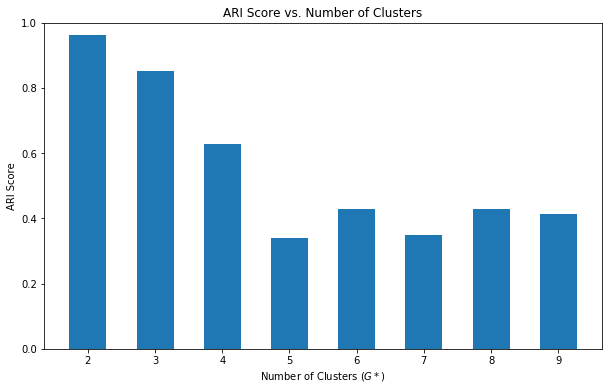

In [40]:
plt.pyplot.figure(figsize=(10, 6))
# plotting the results
plt.pyplot.bar(x = G_vect,
               height = rand_index_G_vect,
               width = .55)
plt.pyplot.xlabel('Number of Clusters ($G*$)')
plt.pyplot.ylabel('ARI Score')
plt.pyplot.ylim(0,1)
plt.pyplot.title('ARI Score vs. Number of Clusters')
plt.pyplot.show()

### Feature Importance

In [41]:
import sys
weeks_exclude_vect = [[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15],[15,16,17]]
feature_list = list(X_train.columns)
rand_index_vect = []

# making a waitbar
toolbar_width = len(feature_list)

In [42]:
sys.stdout.write("[%s]" % (" " * toolbar_width))
sys.stdout.flush()
sys.stdout.write("\b" * (toolbar_width+1))

for feature in feature_list:
    
    rand_index_sum = 0

    # iterating through the week groupings to leave out
    for weeks_exclue in weeks_exclude_vect:
        # creating train/test groups
        train = pass_attempt_df[[x not in weeks_exclude for \
                                 x in list(pass_attempt_df["week"])]].drop([feature], axis = 1)
        test = pass_attempt_df[[x in weeks_exclude for \
                                x in list(pass_attempt_df["week"])]].drop([feature], axis = 1)

        X_train = train.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
        X_test = test.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)

        # train
        clf_train = mixture.GaussianMixture(n_components=2, covariance_type='full')
        f_train = clf_train.fit(X_train)

        # test
        clf_test = mixture.GaussianMixture(n_components=2, covariance_type='full')
        f_test = clf_test.fit(X_test)

        # classifying test group
        y_train = f_train.predict(X_test)
        y_test = f_test.predict(X_test)

        # appling the adjusted rand index
        rand_index_val = adjusted_rand_score(y_train, y_test)
        rand_index_sum += rand_index_val

    rand_index = rand_index_sum/len(weeks_exclude_vect)
    
    rand_index_vect.append(rand_index)
    
    sys.stdout.write("-")
    sys.stdout.flush()

[                            -----------------------------

In [43]:
d = {'feature': feature_list, 'delta_ARI': rand_index_G_vect[0] - np.array(rand_index_vect)}
feature_imp_df = pd.DataFrame(data=d).sort_values('delta_ARI', ascending = False)
feature_imp_df["base_feature"] = [x.split('_pass_forward')[0] if "pass_forward" in x \
                                  else x.split('_ball_snap')[0] if "ball_snap" in x \
                                  else x.split('_time')[0] for x in np.array(feature_imp_df["feature"])]
feature_imp_df["time_period"] = ["Before Ball Thrown" if "pass_forward" in x \
                                 else "Before Ball Thrown" if "ball_snap" in x \
                                 else "After Ball Thrown" if x.endswith("2") \
                                 else "Before Ball Thrown" for x in np.array(feature_imp_df["feature"])]
feature_imp_df["feature"] = [x.upper() for x in feature_imp_df["feature"]]

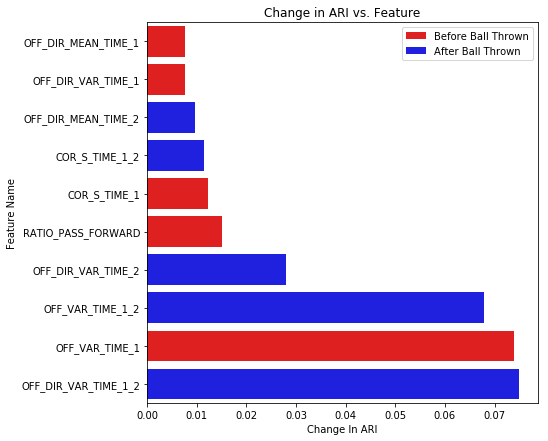

In [44]:
plt.pyplot.figure(figsize=(7,7))

sns.barplot(x="delta_ARI", y="feature", data=feature_imp_df.head(10).sort_values('delta_ARI', ascending = True),
            hue = "time_period", dodge = False, palette = ["red", "blue"])
plt.pyplot.gca().legend().set_title('')
plt.pyplot.title('Change in ARI vs. Feature')
plt.pyplot.ylabel('Feature Name')
plt.pyplot.xlabel('Change In ARI')
plt.pyplot.show()

### Scoring All Plays

In [38]:
pass_attempt_df

,week,gameId,playId,nflId,displayName,position,off_var_time_0,off_var_time_0_1,off_var_time_1,off_var_time_1_2,...,ratio_pass_forward,cb_off_dir_diff_pass_forward,off_dir_diff_between_ball_snap_and_pass_forward,best_cor_x_time_1,best_cor_x_time_1_2,best_cor_y_time_1,best_cor_y_time_1_2,best_cor_x_y_avg_time_1,best_cor_x_y_avg_time_1_2,cor_dist_inter
0,1,2018090600,75,2552689,Ronald Darby,CB,0.000307,2.126595,2.334991,6.760635,...,1.003735,0.69,10.00,0.991059,0.996693,0.996152,0.992656,0.993605,0.994675,0.136746
1,1,2018090600,75,2555383,Jalen Mills,CB,0.001680,2.051115,2.075317,1.658779,...,0.535486,20.40,11.75,0.991839,0.969084,0.893204,0.945554,0.942522,0.957319,0.154773
2,1,2018090600,146,2552689,Ronald Darby,CB,0.000479,1.310370,1.533356,2.695306,...,0.285235,14.63,8.41,0.998055,0.998745,0.995289,0.996726,0.996672,0.997735,0.140171
3,1,2018090600,146,2555383,Jalen Mills,CB,0.000957,0.967793,1.170710,3.954483,...,1.104717,129.71,9.22,0.990084,0.508795,0.853983,0.943507,0.922033,0.726151,0.110491
4,1,2018090600,146,2557958,Sidney Jones,CB,0.123231,1.930732,1.270966,1.080767,...,0.897810,9.97,64.66,0.360666,0.800361,0.975222,0.984590,0.667944,0.892476,0.177724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54580,17,2018123015,3969,2560728,Tre Flowers,CB,0.000094,7.318052,6.521719,5.824754,...,0.188862,3.50,12.89,0.982178,0.978266,0.798684,0.983026,0.890431,0.980646,0.197942
54581,17,2018123015,4057,2495504,Patrick Peterson,CB,0.010847,1.752304,1.917106,2.336483,...,0.965492,2.54,1.98,0.991051,0.995540,0.996290,0.998207,0.993670,0.996874,0.154753
54582,17,2018123015,4057,2540170,David Amerson,CB,0.003717,0.970971,1.212249,1.769824,...,0.093403,1.78,3.12,0.998434,0.999085,0.830865,0.830702,0.914650,0.914894,0.265397
54583,17,2018123015,4104,2495504,Patrick Peterson,CB,0.102378,0.549758,0.487378,0.878557,...,0.201037,2.71,5.92,0.998686,0.999002,0.984561,0.998647,0.991624,0.998824,0.271782


In [39]:
# sampling 45,000 plays to be within CPU limit
X_train = pass_attempt_df.sample(n = 45000) \
                         .drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
X_train.shape

(45000, 29)

In [40]:
# all plays to score
X_score = pass_attempt_df.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
X_score.shape

(54585, 29)

In [41]:
X_score1 = X_score[0:20000]
X_score2 = X_score[20000:]
print(X_score1.shape)
print(X_score2.shape)

(20000, 29)
(34585, 29)


In [42]:
# train
clf_train = mixture.GaussianMixture(n_components=2, covariance_type='full')
f_train = clf_train.fit(X_train)

In [43]:
get_cluster_means(X_train, f_train)

{'best_cor_x_time_1': (0.9882507791340785, 0.8749518502541503),
 'best_cor_x_time_1_2': (0.9872876272995752, 0.8406307671193541),
 'best_cor_x_y_avg_time_1': (0.9643283939797832, 0.8441379077477886),
 'best_cor_x_y_avg_time_1_2': (0.9703566211490771, 0.8291653201321683),
 'best_cor_y_time_1': (0.9404060088254884, 0.8133239652414261),
 'best_cor_y_time_1_2': (0.9534256149985814, 0.8176998731449826),
 'cb_off_dir_diff_pass_forward': (11.23179439156588, 44.847326229380535),
 'cor_dist_inter': (0.34025305690320345, 0.16327059232583122),
 'cor_s_time_1': (0.9258167549942822, 0.7377885492348562),
 'cor_s_time_1_2': (0.8820283320659168, 0.6389926121729047),
 'off_dir_diff_between_ball_snap_and_pass_forward': (13.02729262332309,
  42.332047490660116),
 'off_dir_mean_time_0_1': (39.77184385330587, 58.72136705591255),
 'off_dir_mean_time_1': (22.700022386446683, 49.137707737668144),
 'off_dir_mean_time_1_2': (20.07055502808549, 49.43706495400544),
 'off_dir_mean_time_2': (13.21130415212741, 50.9

In [44]:
full_probs1 = [x[1] for x in f_train.predict_proba(X_score1)]
full_classes1 = f_train.predict(X_score1)

full_probs2 = [x[1] for x in f_train.predict_proba(X_score2)]
full_classes2 = f_train.predict(X_score2)

In [45]:
full_probs = np.append(full_probs1, full_probs2)
full_classes = np.append(full_classes1, full_classes2)

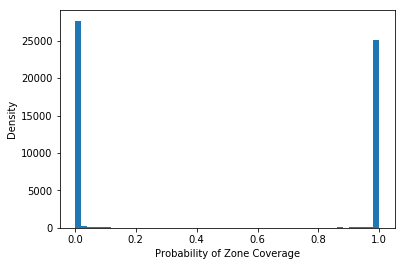

In [46]:
plt.pyplot.hist(full_probs, bins = 50)
plt.pyplot.xlabel('Probability of Zone Coverage')
plt.pyplot.ylabel('Density')
plt.pyplot.show()

In [47]:
pass_attempt_df["zone_probability"] = full_probs
pass_attempt_df["zone_flag"] = full_classes

### Adding in Time Periods

In [54]:
def get_man_zone_classifications(pass_attempt_df_new):
    # sampling 45,000 plays to be within CPU limit
    X_train = pass_attempt_df_new.sample(n = 45000) \
                    .drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
    
    # getting df to score
    X_score = pass_attempt_df_new.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)

    X_score1 = X_score[0:20000]
    X_score2 = X_score[20000:]
    
    # train
    clf_train = mixture.GaussianMixture(n_components=2, covariance_type='full')
    f_train = clf_train.fit(X_train)
    
    full_probs1 = [x[1] for x in f_train.predict_proba(X_score1)]
    full_classes1 = f_train.predict(X_score1)

    full_probs2 = [x[1] for x in f_train.predict_proba(X_score2)]
    full_classes2 = f_train.predict(X_score2)
    
    full_probs = np.append(full_probs1, full_probs2)
    full_classes = np.append(full_classes1, full_classes2)
    
    plt.pyplot.hist(full_probs, bins = 50)
    plt.pyplot.xlabel('Probability of Zone Coverage')
    plt.pyplot.ylabel('Density')
    plt.pyplot.show()
    
    print(get_cluster_means(X_train, f_train))
    
    return full_probs, full_classes

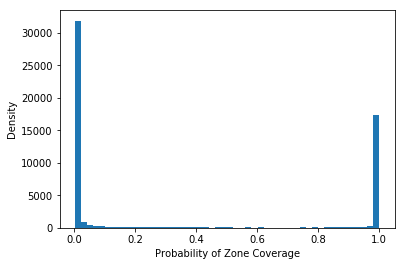

{'off_var_time_0': (0.0015512337090819602, 0.1390711620423555), 'off_mean_time_0': (6.026434632538762, 7.688254410588822)}


In [55]:
# for time 0
pass_attempt_df_new = pass_attempt_df[['week', 'gameId','playId','nflId','displayName','position'] + \
                                     list(pass_attempt_df.columns[[x.endswith('0') for x in pass_attempt_df.columns]]) + \
                                     list(pass_attempt_df.columns[[x.endswith('ball_snap') for x in pass_attempt_df.columns]])]

fun0_output = get_man_zone_classifications(pass_attempt_df_new)
full_probs0 = fun0_output[0]
full_classes0 = fun0_output[1]


In [56]:
pass_attempt_df["zone_probability_ball_snap"] = full_probs0
pass_attempt_df["zone_flag_ball_snap"] = full_classes0

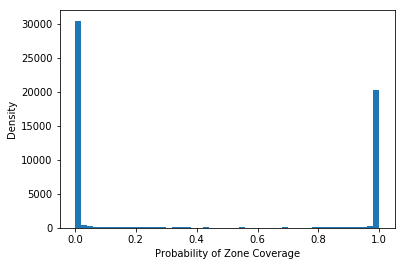

{'off_var_time_1': (1.8308464452564903, 3.432056075757589), 'off_mean_time_1': (4.150211604764003, 7.2070607606014425), 'off_dir_var_time_1': (786.9078716868943, 1331.7301645504024), 'off_dir_mean_time_1': (23.11789234024693, 53.51550134863725), 'cor_s_time_1': (0.9234417992790517, 0.7058247325469816), 'best_cor_x_time_1': (0.9888072536418284, 0.8529700561521757), 'best_cor_y_time_1': (0.9629543650992592, 0.7562256726979663), 'best_cor_x_y_avg_time_1': (0.9758808093705447, 0.8045978644250708), 'ratio_pass_forward': (0.4818407481705753, 2.615769546965463), 'cb_off_dir_diff_pass_forward': (13.986423040834676, 46.75728661322106), 'off_dir_diff_between_ball_snap_and_pass_forward': (13.095706436112032, 47.82884781571507)}


In [57]:
# for time 1
pass_attempt_df_new = pass_attempt_df[['week', 'gameId','playId','nflId','displayName','position'] + \
                                     list(pass_attempt_df.columns[[x.endswith('time_1') for x in pass_attempt_df.columns]]) + \
                                     list(pass_attempt_df.columns[[x.endswith('pass_forward') for x in pass_attempt_df.columns]])]

fun1_output = get_man_zone_classifications(pass_attempt_df_new)
full_probs1 = fun1_output[0]
full_classes1 = fun1_output[1]

In [58]:
pass_attempt_df["zone_probability_pass_attempt"] = full_probs1
pass_attempt_df["zone_flag_pass_attempt"] = full_classes1

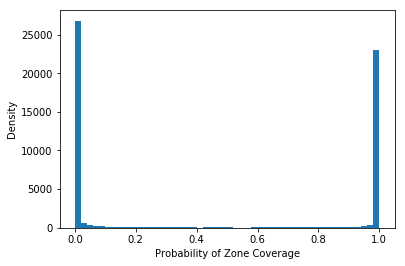

{'off_var_time_2': (0.12601231050681874, 1.1718651957747308), 'off_mean_time_2': (2.5572412148027674, 6.095238767145956), 'off_dir_var_time_2': (25.73945425104754, 782.124576040907), 'off_dir_mean_time_2': (10.880836955449265, 55.520056830406396)}


In [59]:
# for time 2
pass_attempt_df_new = pass_attempt_df[['week', 'gameId','playId','nflId','displayName','position'] + \
                                     list(pass_attempt_df.columns[[x.endswith('time_2') for x in pass_attempt_df.columns]])]

fun2_output = get_man_zone_classifications(pass_attempt_df_new)
full_probs2 = fun2_output[0]
full_classes2 = fun2_output[1]

In [60]:
pass_attempt_df["zone_probability_pass_arrived"] = full_probs2
pass_attempt_df["zone_flag_pass_arrived"] = full_classes2

### Saving Results

In [61]:
pass_attempt_df_final = pass_attempt_df[['week', 'gameId','playId','nflId','displayName','position'] + \
                                     list(pass_attempt_df.columns[[x.startswith('zone') for x in pass_attempt_df.columns]])]

In [62]:
pass_attempt_df_final

,week,gameId,playId,nflId,displayName,position,zone_probability,zone_flag,zone_probability_ball_snap,zone_flag_ball_snap,zone_probability_pass_attempt,zone_flag_pass_attempt,zone_probability_pass_arrived,zone_flag_pass_arrived
0,1,2018090600,75,2552689,Ronald Darby,CB,8.904672e-12,0,0.005414,0,6.555225e-07,0,0.871465,1
1,1,2018090600,75,2555383,Jalen Mills,CB,6.429542e-10,0,0.003582,0,6.863604e-06,0,1.000000,1
2,1,2018090600,146,2552689,Ronald Darby,CB,1.116290e-11,0,0.004702,0,1.325179e-06,0,1.000000,1
3,1,2018090600,146,2555383,Jalen Mills,CB,1.000000e+00,1,0.004656,0,9.999999e-01,1,1.000000,1
4,1,2018090600,146,2557958,Sidney Jones,CB,1.000000e+00,1,1.000000,1,1.000000e+00,1,0.001712,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54580,17,2018123015,3969,2560728,Tre Flowers,CB,2.029320e-12,0,0.004569,0,2.840493e-04,0,0.000055,0
54581,17,2018123015,4057,2495504,Patrick Peterson,CB,5.469435e-14,0,0.757683,1,1.237494e-06,0,0.000169,0
54582,17,2018123015,4057,2540170,David Amerson,CB,2.139830e-14,0,0.004399,0,1.847978e-06,0,0.000064,0
54583,17,2018123015,4104,2495504,Patrick Peterson,CB,2.954367e-11,0,1.000000,1,3.185826e-07,0,0.000059,0


In [64]:
pass_attempt_df_final.to_csv("~/Desktop/CoverageNet/src/01_identify_man_coverage/outputs/corners_pass_attempts_man_zone_classes.csv", 
                             index = False)

In [136]:
pass_attempt_df[(pass_attempt_df["gameId"] == 2018090600) & (pass_attempt_df["playId"] == 2305)]

,week,gameId,playId,nflId,displayName,position,off_var_time_0,off_var_time_0_1,off_var_time_1,off_var_time_1_2,...,best_cor_x_y_avg_time_1_2,cor_dist_inter,zone_probability,zone_flag,zone_probability_ball_snap,zone_flag_ball_snap,zone_probability_pass_attempt,zone_flag_pass_attempt,zone_probability_pass_arrived,zone_flag_pass_arrived
108,1,2018090600,2305,2539334,Desmond Trufant,CB,0.000044,0.292457,0.340575,0.875623,...,0.992858,0.565218,1.107493e-14,0,0.002992,0,1.923706e-07,0,0.000117,0
109,1,2018090600,2305,2539653,Robert Alford,CB,0.206065,1.529384,1.357446,1.206274,...,0.990962,0.698742,8.013242e-19,0,1.000000,1,1.624926e-07,0,0.000059,0
110,1,2018090600,2305,2556445,Brian Poole,CB,0.001275,4.932396,4.947763,6.238556,...,0.851002,0.083124,1.000000e+00,1,0.003364,0,1.000000e+00,1,0.000063,0


In [137]:
pass_attempt_df[(pass_attempt_df["gameId"] == 2018090600) & (pass_attempt_df["playId"] == 2305)][["displayName"] + \
                            list(pass_attempt_df.columns[['off_mean' in x for x in pass_attempt_df.columns]])]

,displayName,off_mean_time_0,off_mean_time_0_1,off_mean_time_1,off_mean_time_1_2,off_mean_time_2
108,Desmond Trufant,2.182031,1.851663,1.748423,2.131377,3.663195
109,Robert Alford,2.965922,1.770077,1.396376,1.220595,0.517474
110,Brian Poole,6.847698,4.918748,4.315951,3.566870,0.570548


# Repeating for Sack Plays!

In [67]:
filter_col = [col for col in sacks_df if not '_o_' in col]
sacks_df = sacks_df[filter_col]

In [68]:
filter_col = [col for col in sacks_df if not 'facing' in col]
sacks_df = sacks_df[filter_col]

In [69]:
filter_col = [col for col in sacks_df if not 'var_y' in col]
sacks_df = sacks_df[filter_col]

In [70]:
filter_col = [col for col in sacks_df if not 'var_x' in col]
sacks_df = sacks_df[filter_col]

In [71]:
filter_col = [col for col in sacks_df if not 'def_mean_time_0' in col]
sacks_df = sacks_df[filter_col]

In [72]:
filter_col = [col for col in sacks_df if not 'def' in col]
sacks_df = sacks_df[filter_col]

In [73]:
filter_col = [col for col in sacks_df if not 'def_var_time_0' in col]
sacks_df = sacks_df[filter_col]

In [74]:
sacks_df.columns

Index(['week', 'gameId', 'playId', 'nflId', 'displayName', 'position',
       'speed_var_time_0', 'speed_var_time_0_1', 'speed_var_time_1',
       'speed_mean_time_0', 'speed_mean_time_0_1', 'speed_mean_time_1',
       'off_var_time_0', 'off_var_time_0_1', 'off_var_time_1',
       'off_mean_time_0', 'off_mean_time_0_1', 'off_mean_time_1',
       'off_dir_var_time_0', 'off_dir_var_time_0_1', 'off_dir_var_time_1',
       'off_dir_mean_time_0', 'off_dir_mean_time_0_1', 'off_dir_mean_time_1',
       'rat_mean_time_0', 'rat_mean_time_0_1', 'rat_mean_time_1',
       'rat_var_time_0', 'rat_var_time_0_1', 'rat_var_time_1', 'cor_x_time_0',
       'cor_x_time_0_1', 'cor_x_time_1', 'cor_y_time_0', 'cor_y_time_0_1',
       'cor_y_time_1', 'cor_s_time_0', 'cor_s_time_0_1', 'cor_s_time_1',
       'cor_avg_x_y_time_0', 'cor_avg_x_y_time_0_1', 'cor_avg_x_y_time_1',
       'cor_rot_best_x_time_0', 'cor_rot_best_x_time_0_1',
       'cor_rot_best_x_time_1', 'cor_rot_best_y_time_0',
       'cor_rot_best_y

In [75]:
filter_col = [col for col in sacks_df if not (('cor' in col) and ('best' not in col) and ('s' not in col))]
sacks_df = sacks_df[filter_col]

In [76]:
filter_col = [col for col in sacks_df if not (('cor_rot' in col))]
sacks_df = sacks_df[filter_col]

In [77]:
filter_col = [col for col in sacks_df if not (('cor' in col) and ('time_0' in col))]
sacks_df = sacks_df[filter_col]

In [78]:
filter_col = [col for col in sacks_df if not (('cor' in col) and ('time_2' in col))]
sacks_df = sacks_df[filter_col]

In [79]:
filter_col = [col for col in sacks_df if not 'off_dir_var_time_0' in col]
sacks_df = sacks_df[filter_col]

In [80]:
filter_col = [col for col in sacks_df if not 'speed' in col]
sacks_df = sacks_df[filter_col]

In [81]:
sacks_df = sacks_df.drop(['cb_off_dir_diff_ball_snap', 'cb_off_dist_ball_snap',
                                       'off_dir_mean_time_0'
                                       ], axis = 1)

In [82]:
filter_col = [col for col in sacks_df if (not 'rat' in col)|('ratio_pass_forward' in col)]
sacks_df = sacks_df[filter_col]

In [83]:
filter_col = [col for col in sacks_df if (not '2' in col)]
sacks_df = sacks_df[filter_col]

In [84]:
sacks_df.columns

Index(['week', 'gameId', 'playId', 'nflId', 'displayName', 'position',
       'off_var_time_0', 'off_var_time_0_1', 'off_var_time_1',
       'off_mean_time_0', 'off_mean_time_0_1', 'off_mean_time_1',
       'off_dir_var_time_1', 'off_dir_mean_time_0_1', 'off_dir_mean_time_1',
       'cor_s_time_1', 'cb_off_dir_diff_qb_sack', 'cb_off_dist_qb_sack',
       'best_cor_x_time_1', 'best_cor_y_time_1', 'best_cor_x_y_avg_time_1'],
      dtype='object')

In [85]:
sacks_df["cor_dist_inter"] = (sacks_df["best_cor_x_y_avg_time_1"]**2)/sacks_df["off_mean_time_1"]
sacks_df["cor_dist_inter"] = sacks_df["cor_dist_inter"].fillna(0)
sacks_df["cor_dist_inter"] = sacks_df["cor_dist_inter"].replace([np.inf], \
                np.percentile(np.array(sacks_df["cor_dist_inter"]), 99))
sacks_df["cor_dist_inter"] = sacks_df["cor_dist_inter"].replace([-np.inf], \
                np.percentile(np.array(sacks_df["cor_dist_inter"]), 1))

In [86]:
sacks_df.head(10)

,week,gameId,playId,nflId,displayName,position,off_var_time_0,off_var_time_0_1,off_var_time_1,off_mean_time_0,...,off_dir_var_time_1,off_dir_mean_time_0_1,off_dir_mean_time_1,cor_s_time_1,cb_off_dir_diff_qb_sack,cb_off_dist_qb_sack,best_cor_x_time_1,best_cor_y_time_1,best_cor_x_y_avg_time_1,cor_dist_inter
0,1,2018090600,776,2539334,Desmond Trufant,CB,0.000389,4.718561,5.473382,4.771215,...,514.650934,25.521875,17.195263,0.802340,37.12,11.512224,0.999221,0.993155,0.996188,0.156758
1,1,2018090600,776,2539653,Robert Alford,CB,0.000083,0.345370,0.251381,1.983317,...,236.038134,43.825208,13.468158,0.865475,21.84,0.890505,0.994428,0.981624,0.988026,0.931778
2,1,2018090600,776,2556445,Brian Poole,CB,0.001125,1.863231,2.358963,2.334981,...,2865.377275,75.475417,70.152895,0.044042,9.75,0.241868,0.949788,0.783449,0.866618,0.349824
3,1,2018090600,839,2539334,Desmond Trufant,CB,0.019996,1.094198,1.178080,6.975783,...,52.918508,10.355593,7.144286,0.874752,4.38,4.687057,0.997203,0.996352,0.996778,0.163544
4,1,2018090600,839,2539653,Robert Alford,CB,0.000035,7.452315,8.463855,2.132386,...,530.482807,38.213051,41.381837,0.953466,11.56,1.568949,0.788554,0.750077,0.769315,0.151729
5,1,2018090600,839,2556445,Brian Poole,CB,0.080615,1.350028,1.574009,6.138672,...,3075.144862,52.003220,48.922041,0.116535,115.44,5.015117,0.922971,0.888392,0.905682,0.145306
6,1,2018090600,1568,2552689,Ronald Darby,CB,0.000058,10.208990,8.961597,9.037849,...,67.413851,7.592000,8.275500,0.894654,8.67,1.552192,0.994436,0.856548,0.925492,0.182354
7,1,2018090600,1568,2555383,Jalen Mills,CB,0.038938,2.510159,1.547464,4.623992,...,2037.377201,25.163000,26.567000,0.876558,9.47,0.889550,0.980798,0.990751,0.985775,0.530008
8,1,2018090600,1568,2557958,Sidney Jones,CB,0.482190,0.753213,0.523905,3.230003,...,425.069416,17.476200,11.718000,0.975121,4.31,1.185116,0.981283,0.999108,0.990195,0.490645
9,1,2018090600,3815,2552689,Ronald Darby,CB,0.000051,9.803451,8.094433,11.349277,...,282.765748,18.388113,20.316279,0.880891,6.99,4.393290,0.990762,0.904859,0.947810,0.132611


In [87]:
sacks_df.columns

Index(['week', 'gameId', 'playId', 'nflId', 'displayName', 'position',
       'off_var_time_0', 'off_var_time_0_1', 'off_var_time_1',
       'off_mean_time_0', 'off_mean_time_0_1', 'off_mean_time_1',
       'off_dir_var_time_1', 'off_dir_mean_time_0_1', 'off_dir_mean_time_1',
       'cor_s_time_1', 'cb_off_dir_diff_qb_sack', 'cb_off_dist_qb_sack',
       'best_cor_x_time_1', 'best_cor_y_time_1', 'best_cor_x_y_avg_time_1',
       'cor_dist_inter'],
      dtype='object')

### Preparing Train/Test Groups

In [88]:
weeks_exclude = [1, 2, 3]
train = sacks_df[[x not in weeks_exclude for x in list(sacks_df["week"])]]
test = sacks_df[[x in weeks_exclude for x in list(sacks_df["week"])]]

In [89]:
X_train = train.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
X_test = test.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)

In [90]:
print(X_train.shape)
print(X_test.shape)

(3252, 16)
(710, 16)


### Fitting GMM Model

In [91]:
# train
clf_train = mixture.GaussianMixture(n_components=2, covariance_type='full')
f_train = clf_train.fit(X_train)

In [92]:
# test
clf_test = mixture.GaussianMixture(n_components=2, covariance_type='full')
f_test = clf_test.fit(X_test)

### Examining Cluster Results

In [93]:
def get_cluster_means(X, f):
    cluster_means = {}
    for iCnt in range(len(X.columns)):
        cluster_means.update({X.columns[iCnt]:(f.means_[0][iCnt],f.means_[1][iCnt])})
    return cluster_means

In [94]:
get_cluster_means(X_train, f_train)

{'best_cor_x_time_1': (0.9867300224239819, 0.8270084474626589),
 'best_cor_x_y_avg_time_1': (0.9783741394670935, 0.8095907464306032),
 'best_cor_y_time_1': (0.9700182565102049, 0.7921730453985474),
 'cb_off_dir_diff_qb_sack': (18.128057523660484, 45.75767480086321),
 'cb_off_dist_qb_sack': (2.260550676086161, 5.608212306723586),
 'cor_dist_inter': (0.41277368168641126, 0.14013419302228083),
 'cor_s_time_1': (0.8696347891117651, 0.6449415898831857),
 'off_dir_mean_time_0_1': (32.59642715282173, 53.72063203107499),
 'off_dir_mean_time_1': (20.044948368837026, 46.4509380118431),
 'off_dir_var_time_1': (734.2966515969185, 1458.8811008662785),
 'off_mean_time_0': (5.104769030630054, 8.210983705907982),
 'off_mean_time_0_1': (3.538393488588586, 6.784233227670504),
 'off_mean_time_1': (3.167028566859867, 6.4506062784508735),
 'off_var_time_0': (0.048165902042107536, 0.05487863725804385),
 'off_var_time_0_1': (2.957460378093055, 6.479537555019283),
 'off_var_time_1': (2.601530143233574, 6.1570

### Computing Rand Index

In [95]:
from sklearn.metrics import adjusted_rand_score

In [96]:
y_train = f_train.predict(X_test)
y_test = f_test.predict(X_test)

In [97]:
adjusted_rand_score(y_train, y_test)

0.8019712813460584

### Iterating Through To Get Cross-Validation Scores

In [40]:
weeks_exclude_vect = [[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15],[15,16,17]]
G_vect = [2, 3, 4, 5, 6, 7, 8, 9]
rand_index_G_vect = []

In [41]:
for G in G_vect:
    rand_index_sum = 0
    # iterating through the week groupings to leave out
    for weeks_exclue in weeks_exclude_vect:
        # creating train/test groups
        train = sacks_df[[x not in weeks_exclude for x in list(sacks_df["week"])]]
        test = sacks_df[[x in weeks_exclude for x in list(sacks_df["week"])]]

        X_train = train.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
        X_test = test.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)

        # train
        clf_train = mixture.GaussianMixture(n_components=G, covariance_type='full', 
                                            n_init = 2, max_iter = 200)
        f_train = clf_train.fit(X_train)

        # test
        clf_test = mixture.GaussianMixture(n_components=G, covariance_type='full',
                                           n_init = 2, max_iter = 200)
        f_test = clf_test.fit(X_test)

        # classifying test group
        y_train = f_train.predict(X_test)
        y_test = f_test.predict(X_test)

        # appling the adjusted rand index
        rand_index_val = adjusted_rand_score(y_train, y_test)
        rand_index_sum += rand_index_val

    rand_index = rand_index_sum/len(weeks_exclude_vect)
    
    rand_index_G_vect.append(rand_index)
    
    print(rand_index)

0.8019712813460584
0.42449621986862196
0.23556349734857682
0.28819332063128317
0.37500733109858814
0.3664688580041606
0.28054796190006354
0.24936609449313493


### Plot eliminating x/y var, speed, and def based variables, replacing Ratio with Cor

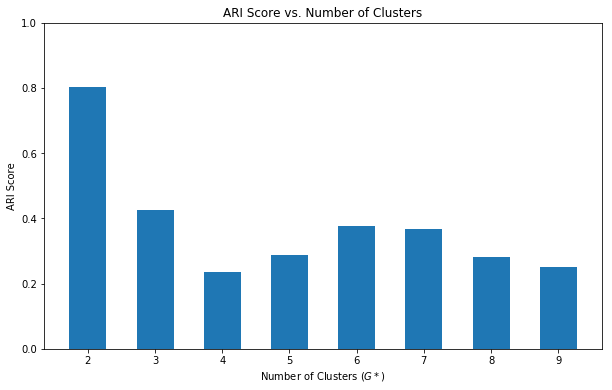

In [42]:
plt.pyplot.figure(figsize=(10, 6))
# plotting the results
plt.pyplot.bar(x = G_vect,
               height = rand_index_G_vect,
               width = .55)
plt.pyplot.xlabel('Number of Clusters ($G*$)')
plt.pyplot.ylabel('ARI Score')
plt.pyplot.ylim(0,1)
plt.pyplot.title('ARI Score vs. Number of Clusters')
plt.pyplot.show()

### Feature Importance

In [43]:
import sys
weeks_exclude_vect = [[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15],[15,16,17]]
feature_list = list(X_train.columns)
rand_index_vect = []

# making a waitbar
toolbar_width = len(feature_list)

In [44]:
sys.stdout.write("[%s]" % (" " * toolbar_width))
sys.stdout.flush()
sys.stdout.write("\b" * (toolbar_width+1))

for feature in feature_list:
    
    rand_index_sum = 0

    # iterating through the week groupings to leave out
    for weeks_exclue in weeks_exclude_vect:
        # creating train/test groups
        train = sacks_df[[x not in weeks_exclude for \
                                 x in list(sacks_df["week"])]].drop([feature], axis = 1)
        test = sacks_df[[x in weeks_exclude for \
                                x in list(sacks_df["week"])]].drop([feature], axis = 1)

        X_train = train.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
        X_test = test.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)

        # train
        clf_train = mixture.GaussianMixture(n_components=2, covariance_type='full')
        f_train = clf_train.fit(X_train)

        # test
        clf_test = mixture.GaussianMixture(n_components=2, covariance_type='full')
        f_test = clf_test.fit(X_test)

        # classifying test group
        y_train = f_train.predict(X_test)
        y_test = f_test.predict(X_test)

        # appling the adjusted rand index
        rand_index_val = adjusted_rand_score(y_train, y_test)
        rand_index_sum += rand_index_val

    rand_index = rand_index_sum/len(weeks_exclude_vect)
    
    rand_index_vect.append(rand_index)
    
    sys.stdout.write("-")
    sys.stdout.flush()

[                ----------------

In [45]:
d = {'feature': feature_list, 'delta_ARI': rand_index_G_vect[0] - np.array(rand_index_vect)}
feature_imp_df = pd.DataFrame(data=d).sort_values('delta_ARI', ascending = False)
feature_imp_df["base_feature"] = [x.split('_pass_forward')[0] if "pass_forward" in x \
                                  else x.split('_ball_snap')[0] if "ball_snap" in x \
                                  else x.split('_time')[0] for x in np.array(feature_imp_df["feature"])]
feature_imp_df["time_period"] = ["Before Ball Thrown" if "pass_forward" in x \
                                 else "Before Ball Thrown" if "ball_snap" in x \
                                 else "After Ball Thrown" if x.endswith("2") \
                                 else "Before Ball Thrown" for x in np.array(feature_imp_df["feature"])]
feature_imp_df["feature"] = [x.upper() for x in feature_imp_df["feature"]]

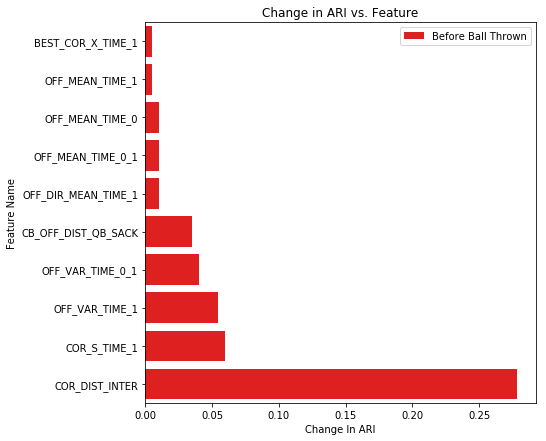

In [46]:
plt.pyplot.figure(figsize=(7,7))

sns.barplot(x="delta_ARI", y="feature", data=feature_imp_df.head(10).sort_values('delta_ARI', ascending = True),
            hue = "time_period", dodge = False, palette = ["red", "blue"])
plt.pyplot.gca().legend().set_title('')
plt.pyplot.title('Change in ARI vs. Feature')
plt.pyplot.ylabel('Feature Name')
plt.pyplot.xlabel('Change In ARI')
plt.pyplot.show()

### Scoring All Plays

In [108]:
sacks_df

,week,gameId,playId,nflId,displayName,position,off_var_time_0,off_var_time_0_1,off_var_time_1,off_mean_time_0,...,off_dir_var_time_1,off_dir_mean_time_0_1,off_dir_mean_time_1,cor_s_time_1,cb_off_dir_diff_qb_sack,cb_off_dist_qb_sack,best_cor_x_time_1,best_cor_y_time_1,best_cor_x_y_avg_time_1,cor_dist_inter
0,1,2018090600,776,2539334,Desmond Trufant,CB,0.000389,4.718561,5.473382,4.771215,...,514.650934,25.521875,17.195263,0.802340,37.12,11.512224,0.999221,0.993155,0.996188,0.156758
1,1,2018090600,776,2539653,Robert Alford,CB,0.000083,0.345370,0.251381,1.983317,...,236.038134,43.825208,13.468158,0.865475,21.84,0.890505,0.994428,0.981624,0.988026,0.931778
2,1,2018090600,776,2556445,Brian Poole,CB,0.001125,1.863231,2.358963,2.334981,...,2865.377275,75.475417,70.152895,0.044042,9.75,0.241868,0.949788,0.783449,0.866618,0.349824
3,1,2018090600,839,2539334,Desmond Trufant,CB,0.019996,1.094198,1.178080,6.975783,...,52.918508,10.355593,7.144286,0.874752,4.38,4.687057,0.997203,0.996352,0.996778,0.163544
4,1,2018090600,839,2539653,Robert Alford,CB,0.000035,7.452315,8.463855,2.132386,...,530.482807,38.213051,41.381837,0.953466,11.56,1.568949,0.788554,0.750077,0.769315,0.151729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957,17,2018123015,3734,2495504,Patrick Peterson,CB,0.002700,10.834212,10.384614,10.337106,...,205.573173,25.468444,12.405429,0.899431,17.17,1.926577,0.992274,0.977765,0.985019,0.152782
3958,17,2018123015,3734,2540170,David Amerson,CB,0.002269,9.006402,8.130155,8.507617,...,17.999067,33.923333,5.074857,0.883068,3.51,1.132961,0.996984,0.988526,0.992755,0.215077
3959,17,2018123015,3932,2553456,Akeem King,CB,0.000193,1.021743,0.703777,3.910985,...,2819.623529,60.645614,45.178723,0.813447,55.69,2.481290,0.983579,0.954403,0.968991,0.431648
3960,17,2018123015,3932,2553637,Justin Coleman,CB,0.037785,1.455538,1.581337,6.148476,...,2108.753222,58.517895,43.520426,0.877561,8.88,5.778945,0.973878,0.989597,0.981737,0.187605


In [109]:
# sampling 45,000 plays to be within CPU limit
X_train = sacks_df.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
X_train.shape

(3962, 16)

In [110]:
# all plays to score
X_score = sacks_df.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
X_score.shape

(3962, 16)

In [113]:
# train
clf_train = mixture.GaussianMixture(n_components=2, covariance_type='full')
f_train = clf_train.fit(X_train)

In [114]:
get_cluster_means(X_train, f_train)

{'best_cor_x_time_1': (0.98705450661198, 0.8238836691226079),
 'best_cor_x_y_avg_time_1': (0.9783818919680055, 0.80784159576597),
 'best_cor_y_time_1': (0.9697092773240316, 0.7917995224093322),
 'cb_off_dir_diff_qb_sack': (18.55384098754475, 45.05236705363773),
 'cb_off_dist_qb_sack': (2.280660366792203, 5.574456939198077),
 'cor_dist_inter': (0.41329952770025524, 0.14018643191641744),
 'cor_s_time_1': (0.8711588662815526, 0.6420455176818568),
 'off_dir_mean_time_0_1': (32.506046844538595, 53.56682483316543),
 'off_dir_mean_time_1': (20.047197822542753, 46.26830710359069),
 'off_dir_var_time_1': (735.9323392943247, 1453.009539433531),
 'off_mean_time_0': (5.042773840651562, 8.174875932509368),
 'off_mean_time_0_1': (3.5064437357190137, 6.745599133809159),
 'off_mean_time_1': (3.142103692759567, 6.4078874154649235),
 'off_var_time_0': (0.045494502271372125, 0.05525102829366192),
 'off_var_time_0_1': (2.880095560197506, 6.506821648479804),
 'off_var_time_1': (2.535869536556111, 6.1837323

In [115]:
full_probs = [x[1] for x in f_train.predict_proba(X_score)]
full_classes = f_train.predict(X_score)

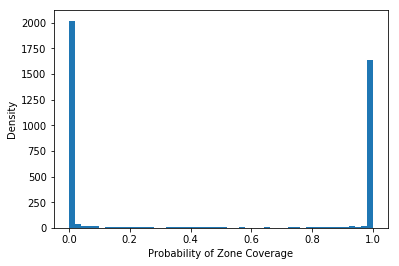

In [116]:
plt.pyplot.hist(full_probs, bins = 50)
plt.pyplot.xlabel('Probability of Zone Coverage')
plt.pyplot.ylabel('Density')
plt.pyplot.show()

In [117]:
sacks_df["zone_probability"] = full_probs
sacks_df["zone_flag"] = full_classes

### Adding in Time Periods

In [124]:
def get_man_zone_classifications(sacks_df_new):
    # sampling 45,000 plays to be within CPU limit
    X_train = sacks_df_new.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
    
    # getting df to score
    X_score = sacks_df_new.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
    
    # train
    clf_train = mixture.GaussianMixture(n_components=2, covariance_type='full')
    f_train = clf_train.fit(X_train)
    
    full_probs = [x[1] for x in f_train.predict_proba(X_score)]
    full_classes = f_train.predict(X_score)
    
    plt.pyplot.hist(full_probs, bins = 50)
    plt.pyplot.xlabel('Probability of Zone Coverage')
    plt.pyplot.ylabel('Density')
    plt.pyplot.show()
    
    print(get_cluster_means(X_train, f_train))
    
    return full_probs, full_classes

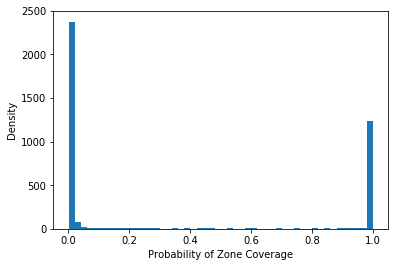

{'off_var_time_0': (0.001462039927121896, 0.14249890688948905), 'off_mean_time_0': (5.817346695342662, 7.628435228312991)}


In [125]:
# for time 0
sacks_df_new = sacks_df[['week', 'gameId','playId','nflId','displayName','position'] + \
                                     list(sacks_df.columns[[x.endswith('0') for x in sacks_df.columns]]) + \
                                     list(sacks_df.columns[[x.endswith('ball_snap') for x in sacks_df.columns]])]

fun0_output = get_man_zone_classifications(sacks_df_new)
full_probs0 = fun0_output[0]
full_classes0 = fun0_output[1]

In [126]:
sacks_df["zone_probability_ball_snap"] = full_probs0
sacks_df["zone_flag_ball_snap"] = full_classes0

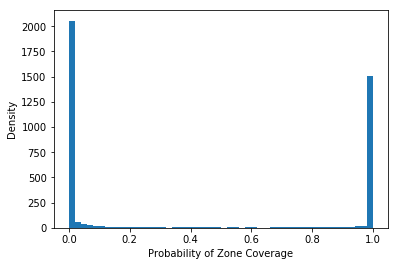

{'off_var_time_1': (2.822357857306718, 6.031615418172733), 'off_mean_time_1': (3.400922829684874, 6.2684388189237845), 'off_dir_var_time_1': (751.0758415383764, 1480.6007475257193), 'off_dir_mean_time_1': (20.82909142161382, 46.958642392995564), 'cor_s_time_1': (0.8701991611595982, 0.6278135182943501), 'best_cor_x_time_1': (0.9878861036220289, 0.8116322127366759), 'best_cor_y_time_1': (0.9741409033326406, 0.7735192435853472), 'best_cor_x_y_avg_time_1': (0.9810135034773348, 0.7925757281610112)}


In [127]:
# for time 1
sacks_df_new = sacks_df[['week', 'gameId','playId','nflId','displayName','position'] + \
                                     list(sacks_df.columns[[x.endswith('time_1') for x in sacks_df.columns]])]

fun1_output = get_man_zone_classifications(sacks_df_new)
full_probs1 = fun1_output[0]
full_classes1 = fun1_output[1]

In [128]:
sacks_df["zone_probability_drop_back"] = full_probs1
sacks_df["zone_flag_drop_back"] = full_classes1

### Saving Results

In [129]:
sacks_df_final = sacks_df[['week', 'gameId','playId','nflId','displayName','position'] + \
                                     list(sacks_df.columns[[x.startswith('zone') for x in sacks_df.columns]])]

In [130]:
sacks_df_final

,week,gameId,playId,nflId,displayName,position,zone_probability,zone_flag,zone_probability_ball_snap,zone_flag_ball_snap,zone_probability_drop_back,zone_flag_drop_back
0,1,2018090600,776,2539334,Desmond Trufant,CB,1.000000e+00,1,0.002588,0,0.000163,0
1,1,2018090600,776,2539653,Robert Alford,CB,2.316213e-48,0,0.002456,0,0.000014,0
2,1,2018090600,776,2556445,Brian Poole,CB,1.000000e+00,1,0.002298,0,1.000000,1
3,1,2018090600,839,2539334,Desmond Trufant,CB,1.013250e-04,0,1.000000,1,0.000497,0
4,1,2018090600,839,2539653,Robert Alford,CB,1.000000e+00,1,0.002467,0,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3957,17,2018123015,3734,2495504,Patrick Peterson,CB,1.295397e-04,0,0.006744,0,0.000411,0
3958,17,2018123015,3734,2540170,David Amerson,CB,6.247320e-06,0,0.004177,0,0.000084,0
3959,17,2018123015,3932,2553456,Akeem King,CB,1.490960e-08,0,0.002505,0,0.000204,0
3960,17,2018123015,3932,2553637,Justin Coleman,CB,1.346955e-04,0,1.000000,1,0.000289,0


In [133]:
sacks_df_final.to_csv("~/Desktop/CoverageNet/src/01_identify_man_coverage/outputs/corners_sacks_man_zone_classes.csv", 
                      index = False)

In [131]:
sacks_df[(sacks_df["gameId"] == 2018090901) & (sacks_df["playId"] == 2885)]

,week,gameId,playId,nflId,displayName,position,off_var_time_0,off_var_time_0_1,off_var_time_1,off_mean_time_0,...,best_cor_x_time_1,best_cor_y_time_1,best_cor_x_y_avg_time_1,cor_dist_inter,zone_probability,zone_flag,zone_probability_ball_snap,zone_flag_ball_snap,zone_probability_drop_back,zone_flag_drop_back


In [132]:
sacks_df[(sacks_df["gameId"] == 2018090901) & (sacks_df["playId"] == 2885)][["displayName"] + \
                            list(sacks_df.columns[['cor_s' in x for x in sacks_df.columns]])]

,displayName,cor_s_time_1
